In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib

In [2]:
dfs = []
for path in glob.glob('./results/**/**/results.csv'):
    dfs.append(pd.read_csv(path, index_col=0))
df = pd.concat(dfs, sort=False)

In [3]:
dfg = df.groupby(['app','name'])

In [4]:
# Get Median of times and Mean of avgCpu and maxMem
pd.concat([
    dfg.median()[['totalTime']],
    dfg.median()[['testTime']],
    dfg.mean()[['avgCpu', 'maxMem']]]
, axis=1, join='inner')

,,totalTime,testTime,avgCpu,maxMem
app,name,,,,
Bower,Resolver .getSource should return the resolver source,31.4550,0.002000,114.466192,278.708203
Chart,testSerialization,24.6330,0.079000,235.296613,548.635547
Closure,testGetFunctionForAstNode,29.4790,0.342500,302.734100,1062.073047
Eslint,CLIEngine executeOnText,131.9095,0.383000,61.908852,819.397266
Express,app .request should extend the request prototype,25.7365,0.034500,110.746097,193.060156
Lang,testLang328,48.1995,0.031000,130.655916,646.399609
Math,testInterval,59.4440,0.033500,153.396569,951.010937
Pencilblue,RequestHandler RequestHandler.getBodyParsers should return the default list of body parsers,48.7320,0.002000,106.989542,456.027734
Shields,The text measurer should produce the same length as before,57.7270,0.064000,121.549313,574.824609


In [5]:
def getDataset(app):
    if app in ["Chart", "Lang", "Math", "Closure", "Time"]: return "D4J" 
    if app in ["Eslint", "Express", "Pencilblue	", "Shields", "Bower"]: return "BJS"
    if app in ["WebApp-1", "WebApp-2", "WebApp-3"]: return "E2E"
    return "NO_APP"

In [6]:
def cleanName(name):
    if name == "CLIEngine executeOnText": return "executedOnText"
    if name == "Resolver .getSource should return the resolver source": return "getSource"
    if name == "app .request should extend the request prototype": return "appRequest"
    return name

In [7]:
def generateBoxPlot(df, column_name):
    plot = df.boxplot(column=[column_name], by='chartName', figsize=(12,4))
    plt.xticks(rotation=15)
    plt.title("")
    plt.suptitle('')
    plot.set_xlabel("")
    # tikzplotlib.save('%s.tex'%column_name, axis_width="12cm", axis_height="5cm")
    #plt.savefig("%s.pdf"%column_name, format="pdf")
    #plt.savefig('histogram.pgf')

In [8]:
only_9 = pd.concat([
    # DEFECTS4J
    dfs[0], dfs[5], dfs[7],
    # BUGSJS
    dfs[1], dfs[2], dfs[3], 
    # E2EDATASET
    dfs[6],dfs[8], dfs[9]
], sort=False)
only_9 = only_9.reset_index()
only_9['chartName'] = only_9.apply (lambda row: getDataset(row['app']) + "-" + cleanName(row['name']), axis=1) 

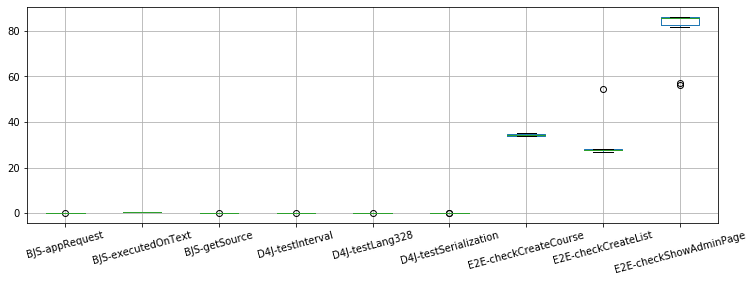

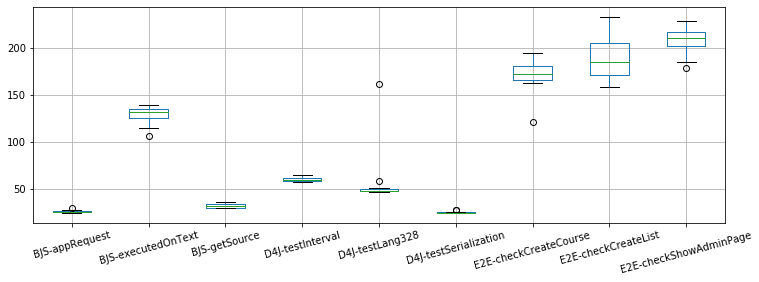

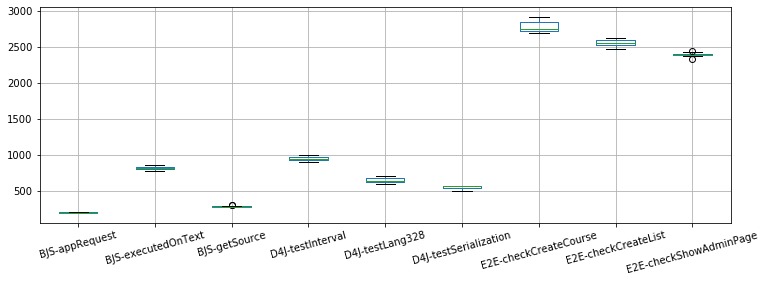

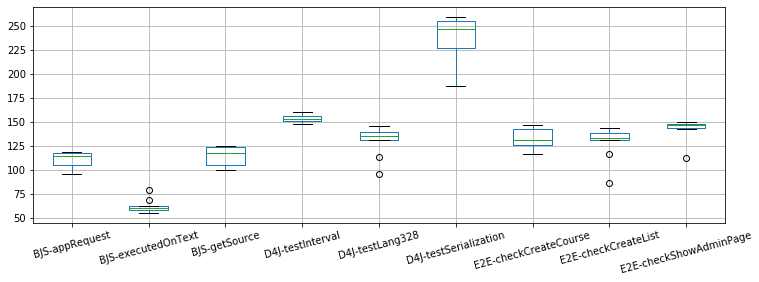

In [9]:
for column in ['testTime', 'totalTime', 'maxMem', 'avgCpu']:
    generateBoxPlot(only_9, column)